In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import json

In [2]:
losses = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/loss.csv", index_col=0)
losses = losses.reset_index()
losses = losses.drop("time", axis=1)

<AxesSubplot:xlabel='index', ylabel='loss'>

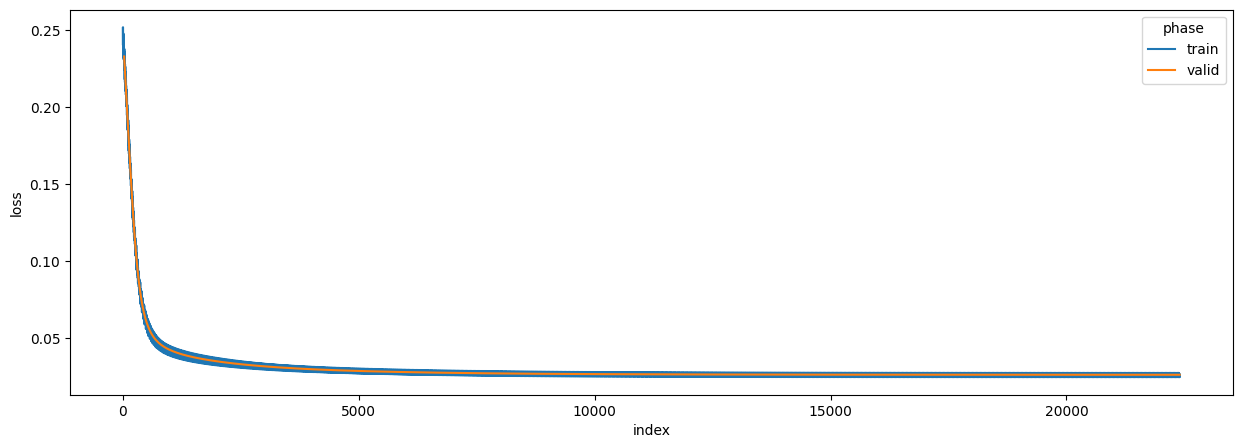

In [3]:
plt.figure(figsize=(15,5))
sns.lineplot(data=losses, x="index", y="loss", hue="phase")


<AxesSubplot:xlabel='index', ylabel='loss'>

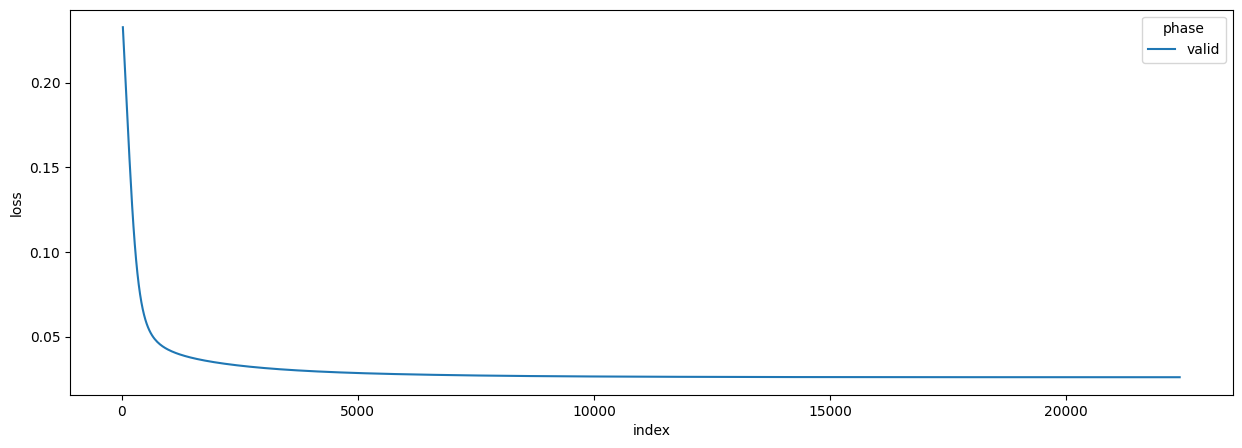

In [4]:
plt.figure(figsize=(15,5))
sns.lineplot(data=losses[losses["phase"]=="valid"], x="index", y="loss", hue="phase")


In [5]:
min(losses.loc[losses["phase"]=="valid", "loss"])

0.0260576479665054

In [6]:
losses[losses["loss"] == min(losses.loc[losses["phase"]=="valid", "loss"])]

,index,loss,phase
22399,22399,0.026058,valid


In [7]:
losses[losses["phase"]=="valid"].iloc[-10:, :]

,index,loss,phase
22147,22147,0.026058,valid
22175,22175,0.026058,valid
22203,22203,0.026058,valid
22231,22231,0.026058,valid
22259,22259,0.026058,valid
22287,22287,0.026058,valid
22315,22315,0.026058,valid
22343,22343,0.026058,valid
22371,22371,0.026058,valid
22399,22399,0.026058,valid


In [8]:
sum(losses.loc[losses["phase"]=="valid", "loss"] < 0.426153)

800

In [9]:
# pred1 = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/predictions_with_model_save.csv", index_col=0)
pred = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/valid_output_states.csv", index_col=0)
true = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/valid_data.csv", index_col=0).reset_index(drop=True)

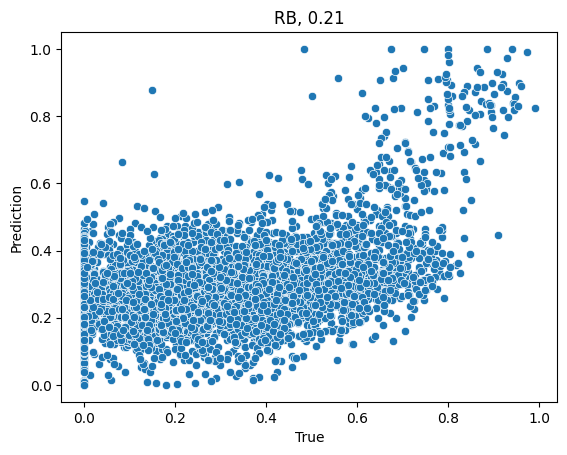

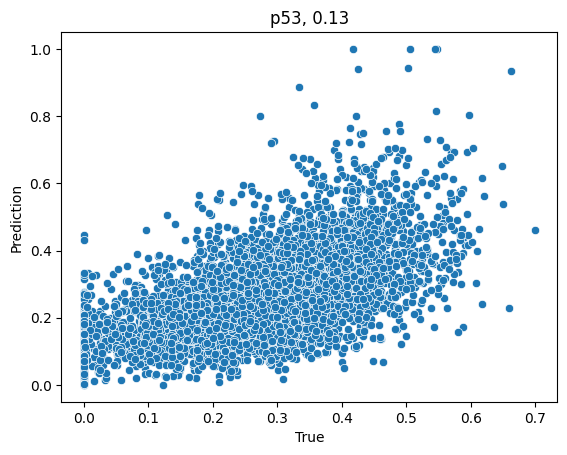

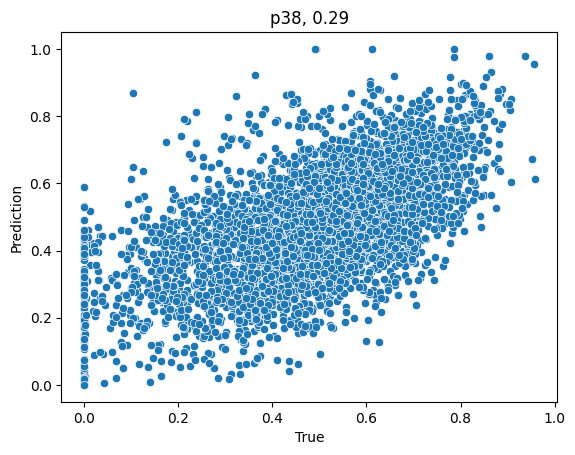

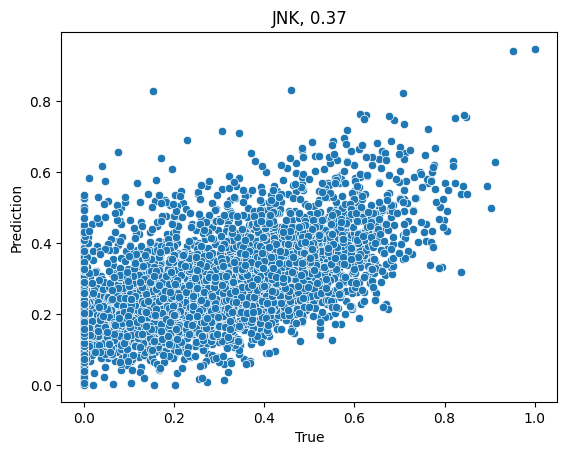

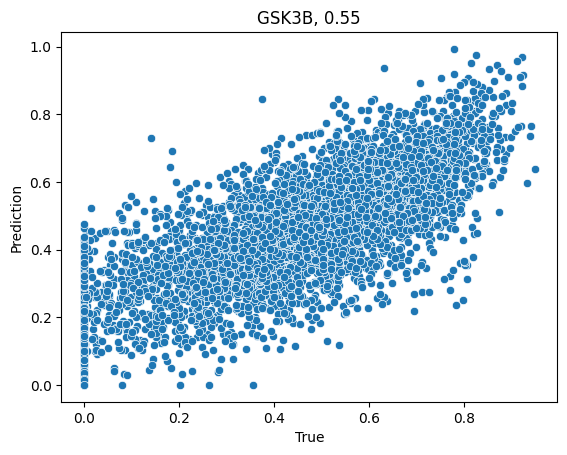

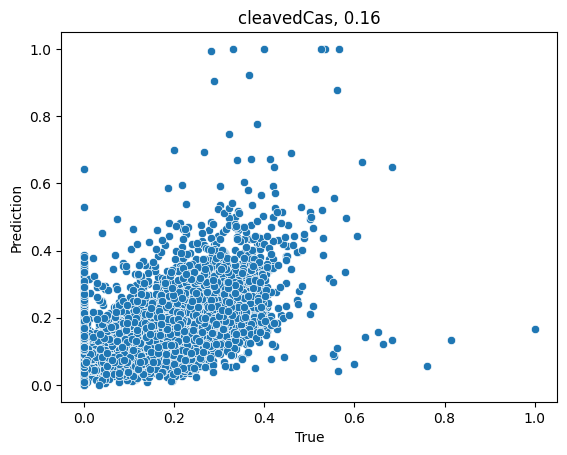

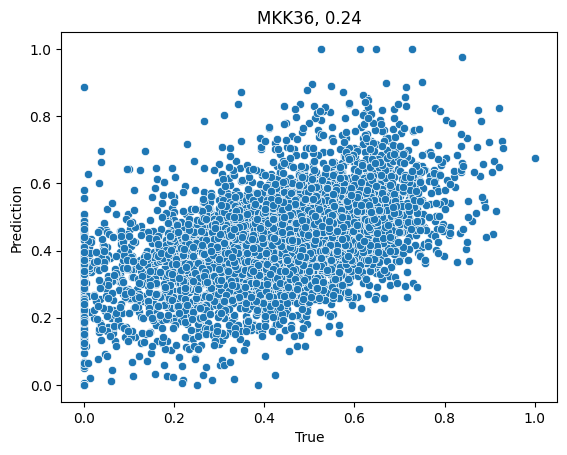

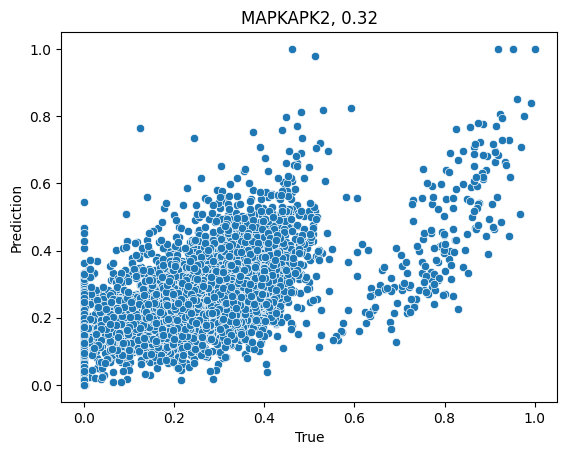

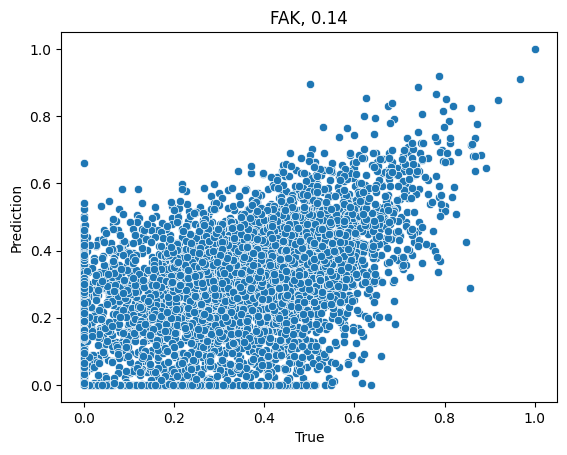

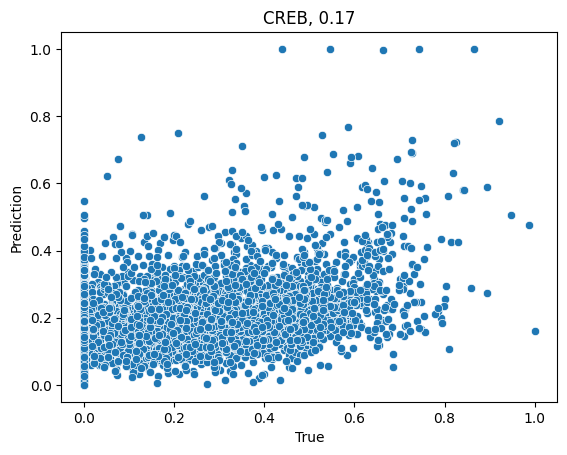

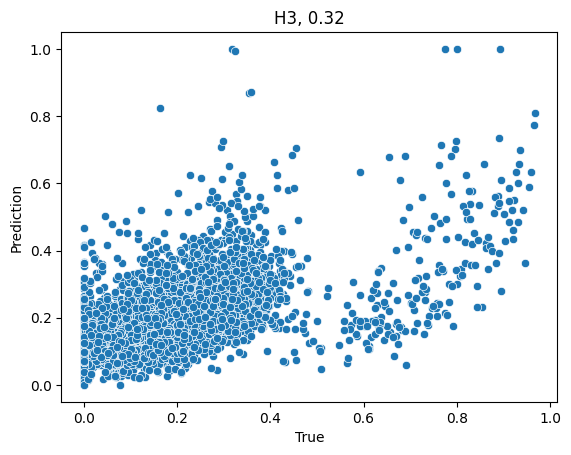

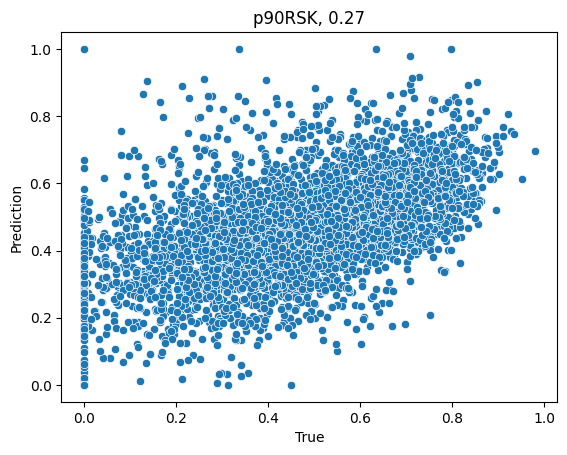

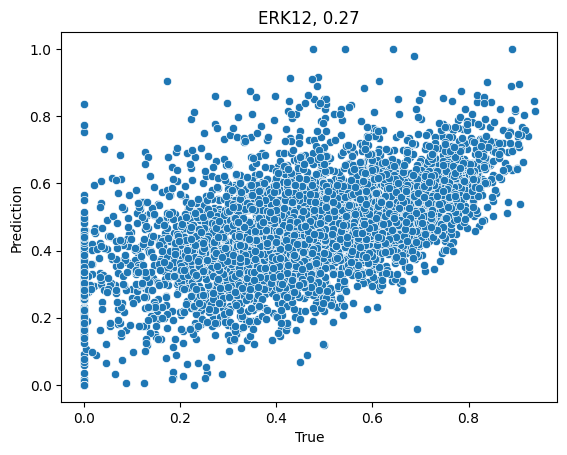

In [52]:
markers = set(pred.columns).intersection(set(true.columns))
eval_markers = ["RB", "p53", "p38", "JNK", "GSK3B", "cleavedCas", "MKK36", "MAPKAPK2", 
                "FAK", "CREB", "H3", "p90RSK", "ERK12"]
r2_scores = []
correlations = []
for marker in eval_markers:
    corr = true[marker].corr(pred[marker], method='pearson')
    correlations.append(corr)
    r2 = r2_score(true[marker], pred[marker])
    r2_scores.append(r2)
    sns.scatterplot(x=true[marker], y=pred[marker])
    plt.xlabel("True")
    plt.ylabel("Prediction")
    plt.title(f"{marker}, {round(r2, 2)}")
    plt.show()

In [53]:
pd.Series(r2_scores).mean()

0.26350923058345715

In [54]:
pd.Series(correlations).mean()

0.5574352943659674

In [55]:
pred.max()

p53           1.000000
RB            1.000000
GSK3B         0.993672
AMPK          1.000000
cleavedCas    1.000000
SMAD23        1.000000
ERK12         1.000000
MSK12         1.000000
MKK36         1.000000
H3            1.000000
p90RSK        1.000000
p38           1.000000
MAPKAPK2      1.000000
CREB          1.000000
AKT_S473      0.987270
AKT           0.993073
AKT_T308      0.982365
SRC           1.000000
FAK           1.000000
MKK4          0.983806
JNK           0.946760
MEK12         1.000000
dtype: float64

In [56]:
pred.min()

p53           2.410840e-10
RB            4.547080e-10
GSK3B         4.648643e-10
AMPK          1.000000e-09
cleavedCas    1.405196e-10
SMAD23        1.000000e-09
ERK12         5.148957e-10
MSK12         2.235091e-10
MKK36         4.338713e-10
H3            1.325197e-10
p90RSK        5.142987e-10
p38           6.622213e-10
MAPKAPK2      1.968299e-10
CREB          1.244138e-10
AKT_S473      1.000000e-09
AKT           4.746566e-10
AKT_T308      1.000000e-09
SRC           1.000000e-09
FAK           7.262521e-10
MKK4          1.000000e-09
JNK           2.848438e-10
MEK12         1.000000e-09
dtype: float64

In [58]:
true[eval_markers].max()

RB            0.990012
p53           0.698918
p38           0.957534
JNK           1.000000
GSK3B         0.949330
cleavedCas    1.000000
MKK36         1.000000
MAPKAPK2      1.000000
FAK           1.000000
CREB          1.000000
H3            0.967040
p90RSK        0.979555
ERK12         0.937650
dtype: float64

In [11]:
train = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/train_data.csv", index_col=0)

In [12]:
train.mean(numeric_only=True)

time           9.000000
b-catenin      1.120196
cleavedCas     0.182813
CyclinB        2.912973
GAPDH          2.848697
IdU            6.447309
Ki.67          2.990437
4EBP1          3.836233
AKT_S473       0.663014
AKT_T308       0.381702
AMPK           0.441792
BTK            3.382206
CREB           0.201101
ERK12          0.466376
FAK            0.326816
GSK3B          0.465111
H3             0.202820
p.HER2         4.108416
JNK            0.277444
MAP3Ks         1.573504
MAPKAPK2       0.276801
MEK12          0.626622
MKK36          0.428871
MKK4           0.544226
NFkB           3.063805
p38            0.486658
p53            0.282677
p90RSK         0.468841
PDPK1          2.582365
PLCg2          2.488488
RB             0.309588
S6             5.079496
p70S6K         2.379113
SMAD23         0.397183
SRC            0.355988
STAT1          2.520605
STAT3          1.592182
STAT5          1.979565
Unnamed: 42    1.000000
dtype: float64

# Check input data

In [15]:
with open("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/MFM223_config.json") as f:
    config = json.load(f)
f.close()


In [16]:
config

{'pkn_sif': '/dccstor/ipc1/CAR/DREAM/DREAMdata/Alice_subnetwork.sif',
 'network_class': 'DREAMBioFuzzNet',
 'data_file': '/dccstor/ipc1/CAR/DREAM/DREAMdata/Time_aligned_per_cell_line/CL_incl_test/MFM223.csv',
 'output_dir': '/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/',
 'time_point': 9,
 'non_marker_cols': ['treatment', 'cell_line', 'time'],
 'treatment_col_name': 'treatment',
 'sel_condition': 'EGF',
 'sample_n_cells': False,
 'filter_starved_stim': True,
 'root_nodes': None,
 'train_treatments': None,
 'valid_treatments': None,
 'train_cell_lines': None,
 'valid_cell_lines': None,
 'convergence_check': False,
 'replace_zero_inputs': 1e-09,
 'inhibition_value': 1.0,
 'learning_rate': 0.001,
 'n_epochs': 800,
 'batch_size': 500,
 'checkpoint_path': '/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/',
 'experiment_name': 'OneCellLine',
 'optimizer': 'SGD',
 'scale_type': 'minmax',
 'patience': 500,
 'cell_lines': 'MFM223'}

In [17]:
from biological_fuzzy_logic_networks.DREAM_analysis.utils import (
    prepare_cell_line_data,
    cl_data_to_input,
)
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet
import pandas as pd
from typing import List, Union, Sequence
from sklearn.metrics import r2_score
import mlflow
import click
import json
import torch
import pickle as pickle
import os

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu


In [18]:
model = DREAMBioFuzzNet.build_DREAMBioFuzzNet_from_file(config["pkn_sif"], n=1.1, K=1)
cl_data = prepare_cell_line_data(
    data_file=config["data_file"],
    time_point=config["time_point"],
    non_marker_cols=config["non_marker_cols"],
    treatment_col_name=config["treatment_col_name"],
    filter_starved_stim=config["filter_starved_stim"],
    sample_n_cells=config["sample_n_cells"],
    sel_condition=config["sel_condition"],
)

<class 'str'>
['MFM223']


In [44]:
# Load train and valid data
(
    train_data,
    valid_data,
    train_inhibitors,
    valid_inhibitors,
    train_input,
    valid_input,
    train,
    valid,
    scaler,
) = cl_data_to_input(
    data=cl_data,
    model=model,
    train_treatments=config["train_treatments"],
    valid_treatments=config["valid_treatments"],
    train_cell_lines=config["train_cell_lines"],
    valid_cell_lines=config["valid_cell_lines"],
    inhibition_value=config["inhibition_value"],
    # add_root_values=config["add_root_values"],
    # input_value=config["input_value"],
    root_nodes=config['root_nodes'],
    replace_zero_inputs=config["replace_zero_inputs"],
    balance_data=True,
)

/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0] = 1e-9
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0] = 1e-9
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [46]:
train_data

{'cleavedCas': tensor([0.2084, 0.2449, 0.2194,  ..., 0.0000, 0.4251, 0.3605]),
 'AKT_S473': tensor([0.7750, 0.7343, 0.6969,  ..., 0.4861, 0.8196, 0.9149]),
 'AKT_T308': tensor([0.4982, 0.6422, 0.5648,  ..., 0.0859, 0.7660, 0.8618]),
 'AMPK': tensor([0.5444, 0.4111, 0.4639,  ..., 0.7652, 0.4838, 0.5638]),
 'CREB': tensor([0.3442, 0.3003, 0.2013,  ..., 0.1791, 0.1981, 0.3716]),
 'ERK12': tensor([0.6000, 0.6954, 0.6286,  ..., 0.1695, 0.7728, 0.8359]),
 'FAK': tensor([0.4340, 0.1258, 0.1772,  ..., 0.4636, 0.1905, 0.4378]),
 'GSK3B': tensor([0.5806, 0.7071, 0.6070,  ..., 0.2914, 0.6958, 0.7990]),
 'H3': tensor([0.2068, 0.3879, 0.2801,  ..., 0.6049, 0.2168, 0.3952]),
 'JNK': tensor([0.0000, 0.6283, 0.3820,  ..., 0.0000, 0.4996, 0.4711]),
 'MAPKAPK2': tensor([0.3064, 0.2976, 0.2541,  ..., 0.7645, 0.5043, 0.2786]),
 'MEK12': tensor([0.7266, 0.6862, 0.6028,  ..., 0.7215, 0.7814, 0.8569]),
 'MKK36': tensor([0.4872, 0.4073, 0.5924,  ..., 0.2679, 0.5908, 0.7115]),
 'MKK4': tensor([0.6270, 0.5881, 

In [49]:
train[markers].max()

/tmp/ipykernel_84903/328432652.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train[markers].max()


RB            1.0
AMPK          1.0
cleavedCas    1.0
p53           1.0
MKK36         1.0
MEK12         1.0
SMAD23        1.0
p90RSK        1.0
JNK           1.0
CREB          1.0
MKK4          1.0
p38           1.0
AKT_S473      1.0
MAPKAPK2      1.0
GSK3B         1.0
FAK           1.0
ERK12         1.0
SRC           1.0
AKT_T308      1.0
H3            1.0
dtype: float64

In [50]:
train[markers].min()

/tmp/ipykernel_84903/3268467385.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train[markers].min()


RB            0.000000e+00
AMPK          1.000000e-09
cleavedCas    0.000000e+00
p53           0.000000e+00
MKK36         0.000000e+00
MEK12         1.000000e-09
SMAD23        1.000000e-09
p90RSK        0.000000e+00
JNK           0.000000e+00
CREB          0.000000e+00
MKK4          1.000000e-09
p38           0.000000e+00
AKT_S473      1.000000e-09
MAPKAPK2      0.000000e+00
GSK3B         0.000000e+00
FAK           0.000000e+00
ERK12         0.000000e+00
SRC           1.000000e-09
AKT_T308      1.000000e-09
H3            0.000000e+00
dtype: float64

In [22]:
import torch
ckpt =  torch.load("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/model.pt", map_location=torch.device('cpu'))
model.load_from_checkpoint(ckpt["model_state_dict"])


In [32]:
len(set(model.biological_nodes).difference(set(model.root_nodes)).intersection(set(train.columns)))

13

In [33]:
config["pkn_sif"]

'/dccstor/ipc1/CAR/DREAM/DREAMdata/Alice_subnetwork.sif'

In [51]:
model.root_nodes

['AMPK', 'SMAD23', 'AKT_S473', 'AKT_T308', 'SRC', 'MKK4', 'MEK12']

In [ ]:
{k: v.mean() for k, v in train_input.items()}

In [ ]:
# import networkx as nx
# nx.write_gexf(model, "/dccstor/ipc1/CAR/DREAM/subnetwork.gexf")
# for (n, d) in model.nodes(data=True):
#     del d["output_state"]
#     if "ground_truth" in d.keys():
#         del d["ground_truth"]
# for n1, n2, d in model.edges(data=True):
#     if "layer" in d.keys():
#         del d["layer"]
# nx.write_gexf(model, "/dccstor/ipc1/CAR/DREAM/subnetwork.gexf")


# Different Hill function init

In [ ]:
losses = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/loss.csv", index_col=0)
losses = losses.reset_index()
losses = losses.drop("time", axis=1)

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=losses, x="index", y="loss", hue="phase")


In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=losses[losses["phase"]=="valid"], x="index", y="loss", hue="phase")


In [ ]:
min(losses.loc[losses["phase"]=="valid", "loss"])

In [ ]:
losses[losses["loss"] == min(losses.loc[losses["phase"]=="valid", "loss"])]

In [ ]:
losses[losses["phase"]=="valid"].iloc[-10:, :]

In [ ]:
sum(losses.loc[losses["phase"]=="valid", "loss"] < 0.430773)

In [ ]:
# pred1 = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/predictions_with_model_save.csv", index_col=0)
pred = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/valid_output_states.csv", index_col=0)
true = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/valid_data.csv", index_col=0).reset_index(drop=True)

In [ ]:
markers = set(pred.columns).intersection(set(true.columns))
for marker in markers:
    sns.scatterplot(x=true[marker], y=pred[marker])
    plt.xlabel("True")
    plt.ylabel("Prediction")
    plt.title(marker)
    plt.show()

In [ ]:
markers